In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [30]:
def f(x,y):
    """
    Функция f(x,y)= cos( x)**2 + sin( x) * cos( x) - y
    :param x: Значение x(float).
    :param y: Значение y(float).
    :return: Результат (float).
    """
    return np.cos( x)**2 + np.sin( x) * np.cos( x) - y

In [39]:
def grad_f(x,y): 
    """
    Градиент функциии f(x,y), определенной выше.
    :param x: Значение x(float).
    :param y: Значение y(float).
    :return: Градиент функции (np.array[2], где первый элемент - градиент по x, второй градиент по y)  
    """
    grad_x = -np.sin(2*x)+np.cos(2*x)
    grad_y = -1
    return np.array([grad_x, grad_y])
    return np.array([grad_x, grad_y])

In [36]:
def grad_descent_2d(f, grad_f, lr, num_iter=100, x0=None, y0=None):
    """
    функция, которая реализует градиентный спуск в минимум для функции f от двух переменных. 
        :param f: функция двух переменных f 
        :param grad_f: градиент функции f (вектор размерности 2)
        :param lr: learning rate алгоритма
        :param num_iter: количество итераций градиентного спуска
        :param x0: Начальное значение x(float).
        :param y0: Начальное значение y(float).
        :return: Матрица размерности (num_iter, 3), где каждая строка содержит (x,y,f(x,y)).
    """
    if x0 is None:
        x0 = np.random.random()
    if y0 is None:
        y0 = np.random.random()

    # будем сохранять значения аргументов и значений функции 
    # в процессе град. спуска в переменную history
    history = []

    # итерация цикла -- шаг градиентнго спуска
    curr_x,curr_y = x0,y0
    for iter_num in range(num_iter):
        entry = np.array([curr_x, curr_y, f(curr_x, curr_y)])
        history.append(entry)
        gradient=grad_f(curr_x,curr_y)
        curr_x -= lr *gradient[0]
        curr_y -= lr *gradient[1]
        

    return np.vstack(history)

In [37]:
lr=0.1
num_iter=20

In [40]:
steps = grad_descent_2d(f, grad_f, lr=lr, num_iter=num_iter)

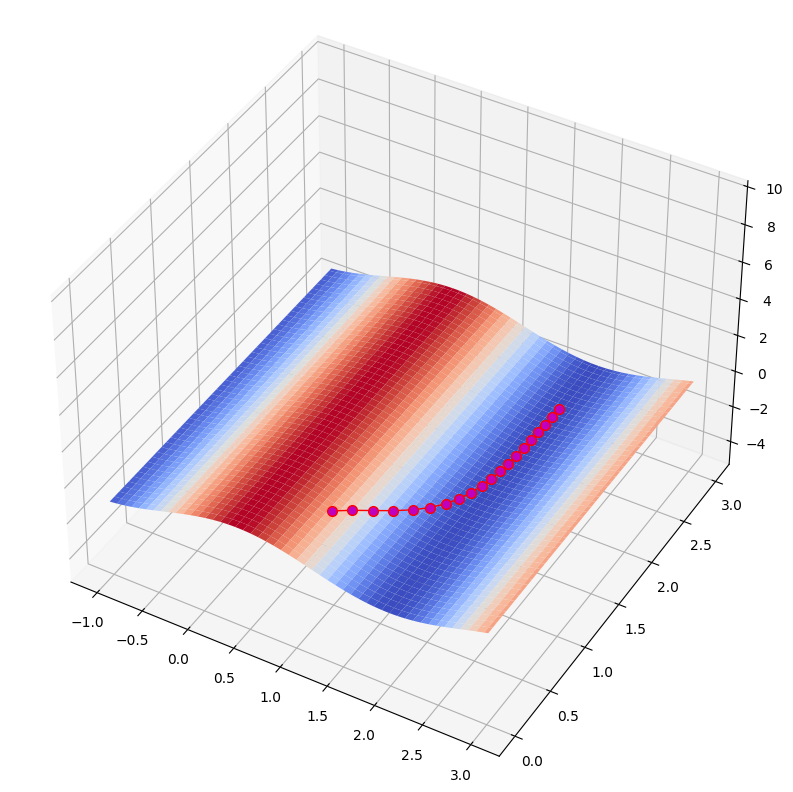

In [62]:
X, Y = np.meshgrid(np.linspace(-1, 3, 100), np.linspace(0, 3, 100))
Z = f(X, Y)

# Создание 3D графика
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm, zorder=2)
ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2],
        marker='o', markersize=7, zorder=3,
        markerfacecolor='m', lw=1, c='red')

ax.set_zlim(-5, 10)
ax.view_init(elev=40)

# Отображение графика и графика значений функции на каждом шаге
plt.show()